In [141]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [142]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [143]:
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


No null values and data types are all float64.

In [144]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [145]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Import StandardScaler
scaler = StandardScaler()

# Fit and transform the data
market_data_scaled = scaler.fit_transform(market_data_df)

# Convert back to DataFrame
market_data_scaled_df = pd.DataFrame(market_data_scaled, index=market_data_df.index, columns=market_data_df.columns)

# Display the first few rows
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [146]:
# Create a DataFrame with the scaled data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
# Convert back to a Pandas DataFrame
market_data_scaled_df = pd.DataFrame(
    market_data_scaled, 
    index=market_data_df.index,   # Preserve coin_id as index
    columns=market_data_df.columns  # Keep original column names
)

# Display the first few rows
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [147]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


# Create an empty list to store the inertia values
k_values = list(range(1, 12))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
# Initialize an empty list to store inertia values
inertia = []

# Loop through k-values from 1 to 11
for k in range(1, 12):
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Fit the model to the scaled data
    kmeans.fit(market_data_scaled_df)
    
    # Append the inertia (sum of squared distances to cluster centers)
    inertia.append(kmeans.inertia_)



# Create a dictionary with the data to plot the Elbow curve
# Initialize an empty dictionary to store k-values and inertia
elbow_data = {}

# Loop through k-values from 1 to 11
for k in range(1, 12):
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Fit the model to the scaled data
    kmeans.fit(market_data_scaled_df)
    
    # Store the inertia value in the dictionary
    elbow_data[k] = kmeans.inertia_

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(list(elbow_data.items()), columns=['k', 'Inertia'])


# Display the DataFrame
elbow_df.head(15)


c:\Users\chadl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\chadl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\chadl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\chadl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

,k,Inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,54.739922
6,7,43.481606
7,8,37.517032
8,9,32.591891
9,10,28.222899


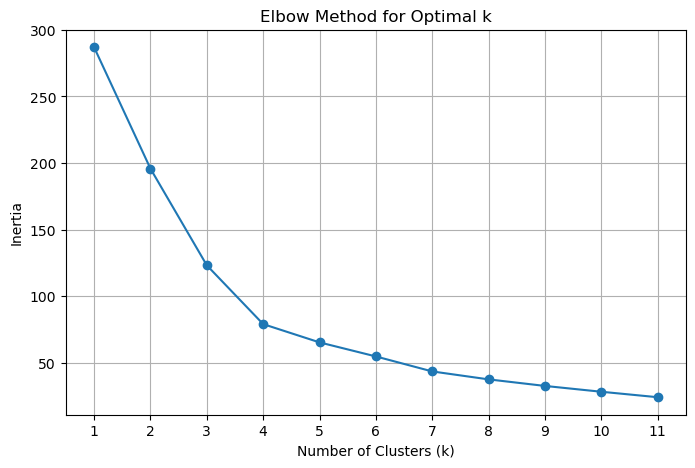

In [148]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(elbow_df['k'], elbow_df['Inertia'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 12))  # Ensure all k-values are visible
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**  Somewhat subjective but I would select k = 4.  After that the inertia reduction becomes less significant.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [149]:
# Initialize the K-Means model using the best value for k
best_k = 4
from sklearn.cluster import KMeans

# Initialize K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=1, n_init=10)


In [152]:
# Fit the K-Means model using the scaled data
market_data_scaled_df['Cluster'] = kmeans.fit_predict(market_data_scaled_df)
market_data_scaled_df.head()


c:\Users\chadl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [153]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(market_data_scaled_df)


# View the resulting array of cluster values.
cluster_labels

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0])

In [154]:
# Create a copy of the DataFrame
market_data_scaled_copy = market_data_scaled_df.copy()


In [155]:
# Add a new column to the DataFrame with the predicted clusters
market_data_scaled_copy['Cluster'] = cluster_labels


# Display sample data
market_data_scaled_copy.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,1
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,1
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,1
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,1


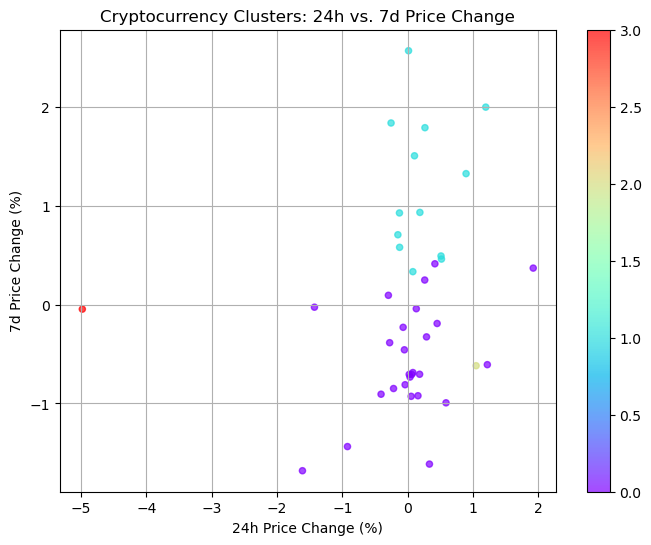

In [156]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
ax = market_data_scaled_copy.plot(
    kind="scatter",
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c=market_data_scaled_copy["Cluster"],  # Use clusters for coloring
    colormap="rainbow",
    figsize=(8, 6),
    alpha=0.7,
)

# Add labels and title
plt.xlabel("24h Price Change (%)")
plt.ylabel("7d Price Change (%)")
plt.title("Cryptocurrency Clusters: 24h vs. 7d Price Change")
plt.grid(True)

# Show plot
plt.show()



### Optimize Clusters with Principal Component Analysis.

In [157]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

# Create a PCA model instance with 3 components
pca = PCA(n_components=3)

In [159]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_pca = pca.fit_transform(market_data_scaled_df)
# Convert the transformed data into a DataFrame
market_pca_df = pd.DataFrame(market_pca, index=market_data_scaled_df.index, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
print(market_pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.138364  1.020224  0.623382
ethereum     -0.059867  0.623672  1.092763
tether       -0.625598 -0.084966 -0.648152
ripple       -0.659851 -0.122624 -0.483037
bitcoin-cash -0.241455  2.355599  1.918832


In [160]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
# Display the explained variance for each principal component
print("Explained Variance Ratio:")
print(f"PC1: {explained_variance[0]:.4f}")
print(f"PC2: {explained_variance[1]:.4f}")
print(f"PC3: {explained_variance[2]:.4f}")

# Display total variance explained by the three components
print(f"Total Explained Variance: {explained_variance.sum():.4f}")

Explained Variance Ratio:
PC1: 0.3794
PC2: 0.3292
PC3: 0.1846
Total Explained Variance: 0.8932


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 0.8950 (or 89.50%). 

In [ ]:
# Create a new DataFrame with the PCA data.
market_pca_df = pd.DataFrame(market_pca, index=market_data_scaled_df.index, columns=['PC1', 'PC2', 'PC3'])

# Creating a DataFrame with the PCA data
#This seems like a duplication from previous markdown.

# Copy the crypto names from the original data
crypto_names = market_data_scaled_df.index.copy()

# Set the coinid column as index
market_pca_df.index.name = "coin_id"

# Display sample data
print(market_pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.138364  1.020224  0.623382
ethereum     -0.059867  0.623672  1.092763
tether       -0.625598 -0.084966 -0.648152
ripple       -0.659851 -0.122624 -0.483037
bitcoin-cash -0.241455  2.355599  1.918832


### Find the Best Value for k Using the PCA Data

In [165]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

# Create an empty list to store the inertia values
pca_k_values = list(range(1, 12))


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
from sklearn.cluster import KMeans

# Initialize an empty list to store inertia values
pca_inertia = []

# Loop through k-values from 1 to 11
for k in pca_k_values:
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
    
    # Fit the model to the PCA-transformed data
    kmeans.fit(market_pca_df[['PC1', 'PC2', 'PC3']])
    
    # Append the inertia value to the list
    pca_inertia.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": pca_k_values, "Inertia": pca_inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
elbow_df_pca.head()

c:\Users\chadl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\chadl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\chadl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\chadl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

,k,Inertia
0,1,272.506389
1,2,176.666894
2,3,99.964744
3,4,47.550534
4,5,36.287155


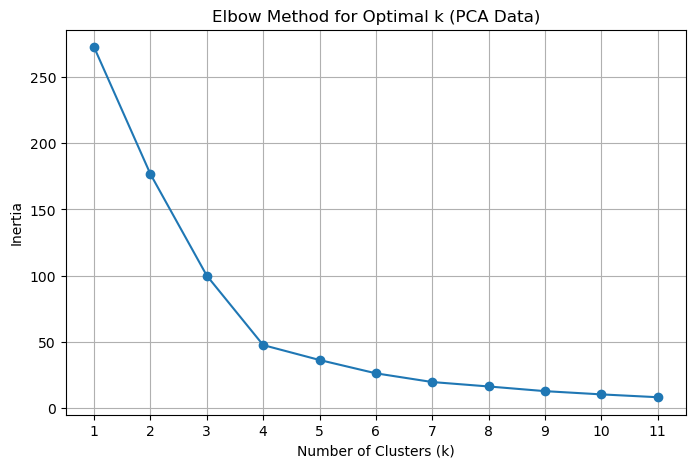

In [166]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8,5))
plt.plot(elbow_df_pca["k"], elbow_df_pca["Inertia"], marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k (PCA Data)")
plt.xticks(pca_k_values)  # Ensure all k-values are visible
plt.grid(True)

# Show the plot
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k


In [ ]:
# Fit the K-Means model using the PCA data


In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data


# Print the resulting array of cluster values.


In [ ]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [ ]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`. 


### Determine the Weights of Each Feature on each Principal Component

In [ ]:
# Use the columns from the original scaled DataFrame as the index.


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    